# Задача №12

Предсказать сорт винограда из которого сделано вино, используя [результаты химических анализов](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) ([описание](http://archive.ics.uci.edu/ml/datasets/Wine) данных), c помощью [KNN](http://www.machinelearning.ru/wiki/index.php?title=Метод_k_ближайших_соседей_%28пример%29) - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [103]:
import sklearn.neighbors
import sklearn.model_selection
import sklearn.metrics
import sklearn.cross_validation
import sklearn.preprocessing
import io
import numpy as np
import scipy as scp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Загружаем данные

In [104]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD/OD of diluted wines', 'Proline ']
data[:15]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD/OD of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


### Выброка+обучение

In [105]:
wine_data=data[data.columns[data.columns!='Class']]
wine_class=data['Class']
neighbours=range(1,20)
metrics=['euclidean', 'manhattan', 'chebyshev']
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(wine_data, wine_class,test_size=0.5)

error=[]
for i in range(3):
    error.append([])
    for k in range(1,20):
        neighbor = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k, metric= metrics[i])
        neighbor.fit(X_train,y_train)
        predictions = neighbor.predict(X_test)
        accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
        error[i].append(1-accuracy)

### График

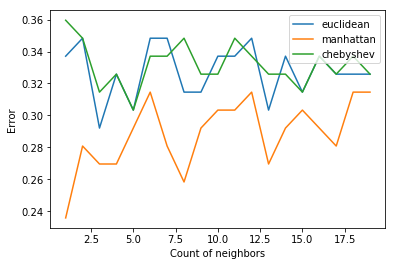

In [106]:
plt.figure()
for i in range(3):
    plt.plot(neighbours,error[i], label=metrics[i])

plt.xlabel('Count of neighbors')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.show()

### Вывод

Рассмотрено 3 метрики: Евклидова, Максимум модулей(Чебышев) и Сумма модулей(манхэтен).

Range для ближайший соседий 1-20.
Лучше всего метод манхэтен, который больше(=) 8.

### ДЗ №3 (анализ ошибки)

In [113]:
dataset = scp.genfromtxt(
    io.StringIO(data.text),
    delimiter=',',
    dtype=[('class', scipy.int8), ('features', scipy.float64, (13,))]
)

x = [item[1] for item in dataset]
y = [item[0] for item in dataset]
k = 12
test_size = range(6, 95, 5)

means = {}
for size in test_size:
    x_train, x_test, y_train, y_test = sklearn.model_selection(x, y, test_size=size/100, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    
    error = 1 - scipy.mean(prediction == y_test)
    std = scipy.std(prediction == y_test)
    means[size/100] = [error, std]

sizes = list(means.keys())
errors = []
stds = []
for item in means.values():
    errors.append(item[0])
    stds.append(item[1])
    
fig, ax = plt.subplots()
ax.plot(sizes, errors, color="blue", label="error")
ax.plot(sizes, stds, color="red", label="std")
ax.set_xlabel("Size of test sample")
ax.legend()

plt.show()
fig.savefig('Error_Analysis.png')


AttributeError: 'DataFrame' object has no attribute 'text'